<a href="https://colab.research.google.com/github/karanveersingh5623/DeepLearning-examples/blob/master/Dense_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape
type(train_images)

numpy.ndarray

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

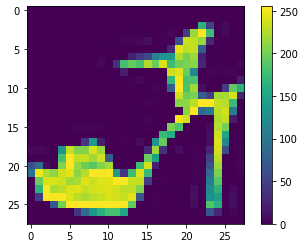

In [ ]:
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=8)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2301 - accuracy: 0.9146
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2225 - accuracy: 0.9163
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2164 - accuracy: 0.9191
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2117 - accuracy: 0.9209
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2026 - accuracy: 0.9244
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1981 - accuracy: 0.9261
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1920 - accuracy: 0.9275
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1876 - accuracy: 0.9291


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8826
Test accuracy: 0.8826000094413757


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([4.3216126e-08, 5.6027349e-12, 8.6326762e-10, 4.1452014e-15,
       8.1161478e-10, 2.3301395e-04, 5.4954530e-10, 4.2922678e-03,
       9.1313286e-09, 9.9547464e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

Trouser


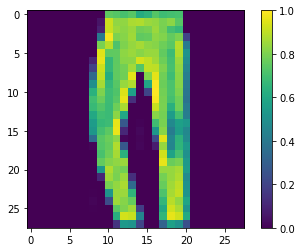

In [ ]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[5]) ])
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()